#HW3　Monte Carlo control algorithm

1. deadline on 10/27
2. Upload HW3_name.ipynb and HW3_name.pdf to eeclass->homework.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from matplotlib.table import Table


### Enviroment
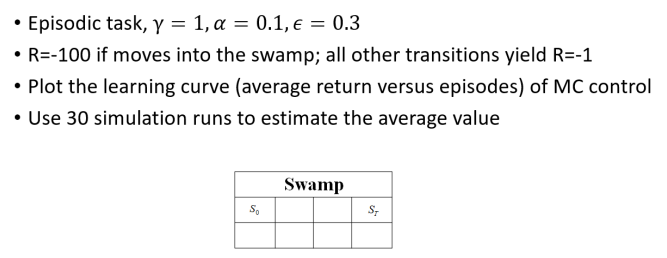

In [93]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]


In [94]:
# Maintain state with list datatype.
def step(state, action):
  state_n = (state + action).tolist()
  if state_n[0] < 0 or state_n[0] > 3 or state_n[1] < 0 or state_n[1] > 2:
    state_n = state
  if state_n[1] == 2:
    reward = -100
  else:
    reward = -1

  return state_n, reward

def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(4):
    for j in range(3):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[i][2-j])
      if data[i][2-j][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[i][2-j][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[i][2-j][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[i][2-j][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[i][2-j][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[i][2-j][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[i][2-j][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[i][2-j][3], verticalalignment='center', horizontalalignment='center')
  #from google.colab import files #google.colab only
  
  plt.savefig("3.png")
  #files.download("3.png") #google.colab only


def draw_image(image):
  fig, ax = plt.subplots()
  ax.set_axis_off()
  tb = Table(ax, bbox=[0, 0, 1, 1])
  nrows, ncols = image.shape
  width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
  for (i,j), val in np.ndenumerate(image):
      # Index either the first or second item of bkg_colors based on
      # a checker board pattern
      idx = [j % 2, (j + 1) % 2][i % 2]
      color = 'white'
      tb.add_cell(2-j, i, width, height, text=val, 
                    loc='center', facecolor=color)

    # Row Labels...
  for i, label in enumerate(range(len(image[1]))):
      tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                  edgecolor='none', facecolor='none')
    # Column Labels...
  for j, label in enumerate(range(len(image))):
      tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                          edgecolor='none', facecolor='none')
  ax.add_table(tb)
  #from google.colab import files #google.colab only
  plt.savefig("3.png")
  #files.download("3.png") #google.colab only



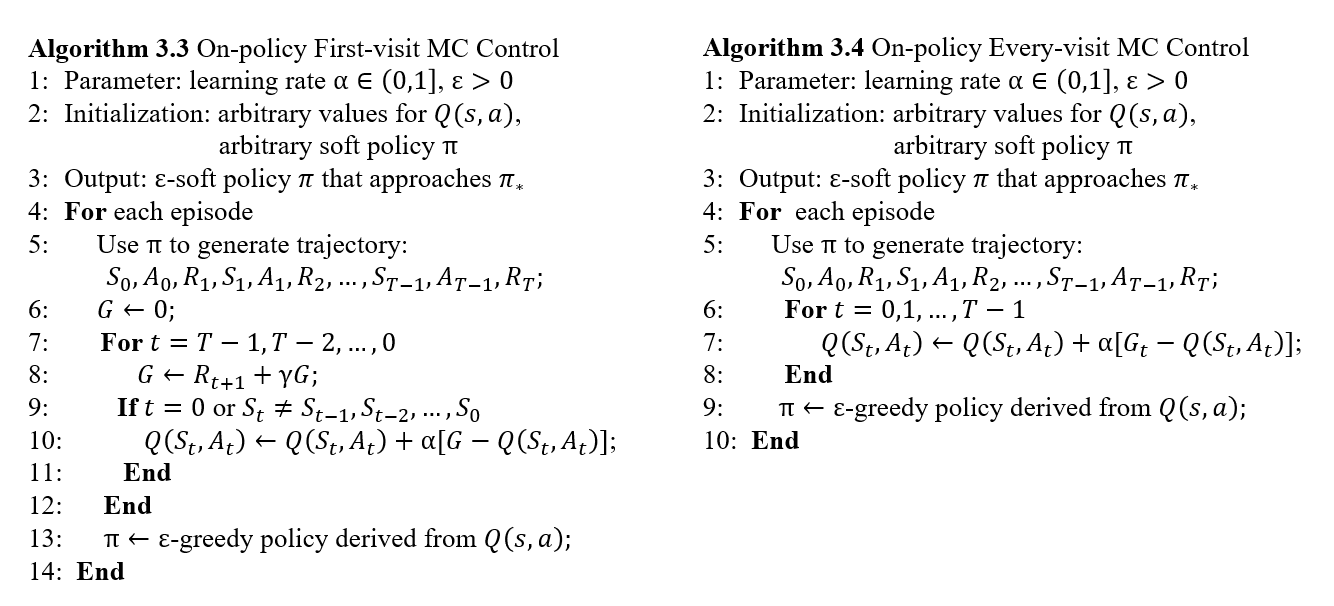

In [88]:
def first_visit_MC_control(epis):
  
  q_value = rd.rand(4, 3, len(ACTIONS))
  q_value[3][1] = 0
  everytimes_reward = []

  for z in range(epis):
    #until to ST
    tra =[]
    state = [0,1]
    G = 0
    #print("number",z,q_value)
    while state != [3,1]:
      if rd.rand() < 0.3:
        action = rd.randint(0,4)
      else:
        action = np.argmax(q_value[state[0],state[1]])
      #print(action)
      state_,reward=step(state,ACTIONS[action])
      tra.append([state,action,reward])
      state = state_
     
    #new_q_value = np.array(q_value)#別設定0阿~~~~~
    plot_reward = 0
    for i in range(len(tra)-1,-1,-1):
      plot_reward += tra[i][2]
      iterate = 0
      G = tra[i][2] + 1 * G
      for j in range(i):
        if tra[i][0] == tra[j][0]:
          iterate = 1
      if i == 0 or iterate == 0:
        q_value[tra[i][0][0],tra[i][0][1],tra[i][1]] = q_value[tra[i][0][0],tra[i][0][1],tra[i][1]] + 0.1 * (G - q_value[tra[i][0][0],tra[i][0][1],tra[i][1]])
    everytimes_reward.append(plot_reward)
    
    
  return q_value,everytimes_reward

In [103]:
def every_visit_MC_control(epis):
  q_value = rd.rand(4, 3, len(ACTIONS))
  q_value[3][1] = 0
  everytimes_reward = []
  for _ in range(epis):
    #until to ST
    tra =[]
    state = [0,1]
    
    while state != [3,1]:
      if rd.rand() < 0.3:
        action = rd.randint(0,4)
      else:
        action = np.argmax(q_value[state[0],state[1]])
      #print(action)
      state_,reward=step(state,ACTIONS[action])
      tra.append([state,action,reward])
      state = state_
     
    plot_reward = 0
    for i in range(0,len(tra)):
      plot_reward += tra[i][2]
      G = 0
      for j in range(len(tra)-1,i-1,-1):
        G = tra[j][2] + 1 * G
      q_value[tra[i][0][0],tra[i][0][1],tra[i][1]] = q_value[tra[i][0][0],tra[i][0][1],tra[i][1]] + 0.1 * (G - q_value[tra[i][0][0],tra[i][0][1],tra[i][1]])
    everytimes_reward.append(plot_reward)
        
  return q_value,everytimes_reward

In [106]:
def first_visit_MC_predict(epis):
  q_value = rd.rand(4, 3)
  q_value[3][1] = 0
  everytimes_reward = []
  for z in range(epis):
    #until to ST
    tra =[]
    state = [0,1]
    G = 0
    while state != [3,1]:
      temp = -500
      if rd.rand() < 0.3:
        action = rd.randint(0,4)
      else:
        for i in range(4):
          next_state_temp, reward_temp = step(state,ACTIONS[i])
          if q_value[next_state_temp[0]][next_state_temp[1]] > temp:
              temp = q_value[next_state_temp[0]][next_state_temp[1]]
              action = i
      state_, reward = step(state, ACTIONS[action])
      tra.append([state, action, reward])
      state = state_
    plot_reward = 0
    for i in range(len(tra)-1,-1,-1):
      plot_reward += tra[i][2]
      iterate = 0
      G = tra[i][2] + 1 * G
      for j in range(i):
        if tra[i][0] == tra[j][0]:
          iterate = 1
      if i == 0 or iterate == 0:
        q_value[tra[i][0][0], tra[i][0][1]] = q_value[tra[i][0][0], tra[i][0][1]] + 0.1 * (G - q_value[tra[i][0][0], tra[i][0][1]])
    everytimes_reward.append(plot_reward)
  return q_value,everytimes_reward

In [116]:
def every_visit_MC_predict(epis):
  q_value = rd.rand(4, 3)
  q_value[3][1] = 0
  everytimes_reward = []
  for _ in range(epis):
    #until to ST
    tra =[]
    state = [0,1]
    while state != [3,1]:
      temp = -500
      if rd.rand() < 0.3:
        action = rd.randint(0,4)
      else:
        for i in range(4):
          next_state_temp, reward_temp = step(state,ACTIONS[i])
          if q_value[next_state_temp[0]][next_state_temp[1]] > temp:
            temp = q_value[next_state_temp[0]][next_state_temp[1]]
            action = i
      state_,reward=step(state, ACTIONS[action])
      tra.append([state, action, reward])
      state = state_
    plot_reward = 0
    for i in range(0,len(tra)):
      plot_reward += tra[i][2]
      G = 0
      for j in range(len(tra)-1,i-1,-1):
        G = tra[j][2] + 1 * G
      q_value[tra[i][0][0],tra[i][0][1]] = q_value[tra[i][0][0],tra[i][0][1]] + 0.1 * (G - q_value[tra[i][0][0],tra[i][0][1]])
    everytimes_reward.append(plot_reward)
  return q_value,everytimes_reward

# Result(60%):

>first_visit_MC_control

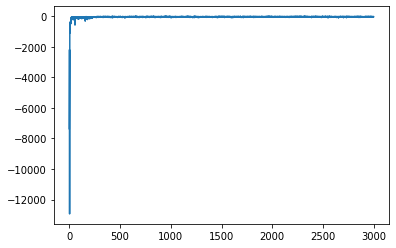

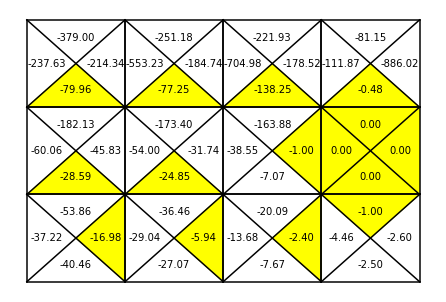

In [101]:
# first_visit_MC_control
epsode = 3000
q_value = np.zeros([4,3,4])
new_q_value = np.zeros([4,3,4])

epis_times_reward = np.zeros(epsode)
new_epis_times_reward = []

for _ in range(30): 
  new_q_value,new_epis_times_reward = first_visit_MC_control(epsode)
  q_value += new_q_value
  new_epis_times_reward = np.array(new_epis_times_reward)
  epis_times_reward += new_epis_times_reward 


#learning curve
epis_times_reward /= 30
plt.plot(epis_times_reward)
#for q table
q_value /= 30
drawTable(q_value)

>every_visit_MC_control

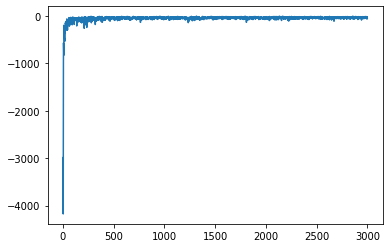

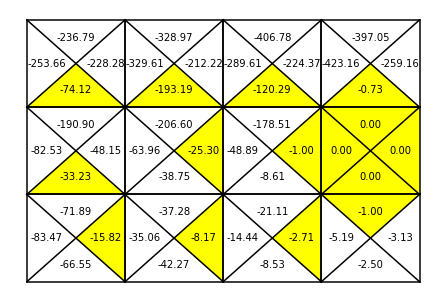

In [112]:
# every_visit_MC_control
epsode = 3000
q_value = np.zeros([4,3,4])
new_q_value = np.zeros([4,3,4])

epis_times_reward = np.zeros(epsode)
new_epis_times_reward = []

for _ in range(30): 
  new_q_value,new_epis_times_reward = every_visit_MC_control(epsode)
  q_value += new_q_value
  new_epis_times_reward = np.array(new_epis_times_reward)
  epis_times_reward += new_epis_times_reward 


#learning curve

epis_times_reward /= 30
plt.plot(epis_times_reward)
#for q table
q_value /= 30
drawTable(q_value)

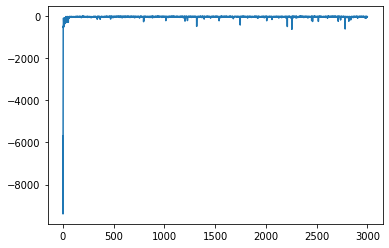

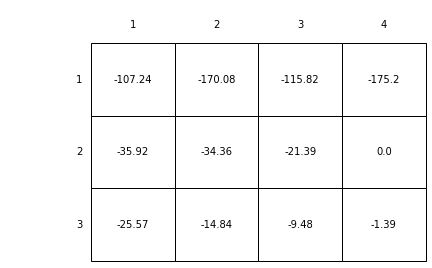

In [110]:
# first_visit_MC_predict
epsode = 3000
v_value = np.zeros([4,3])
new_v_value = np.zeros([4,3])

epis_times_reward = np.zeros(epsode)
new_epis_times_reward = []

for _ in range(30): 
  new_v_value,new_epis_times_reward = first_visit_MC_predict(epsode)
  v_value += new_v_value
  new_epis_times_reward = np.array(new_epis_times_reward)
  epis_times_reward += new_epis_times_reward 

#learning curve

epis_times_reward /= 30
plt.plot(epis_times_reward)
#for q table
v_value /= 30
draw_image(np.round(v_value,decimals = 2))
# first_visit_MC_predict

>every_visit_MC_predict

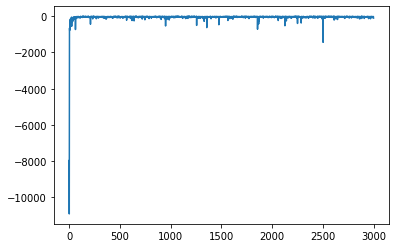

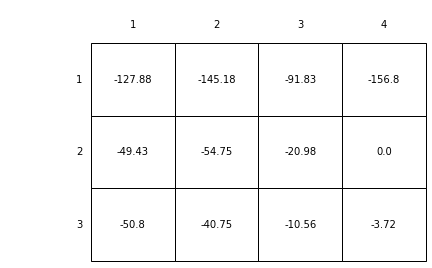

In [119]:
# every_visit_MC_predict
v_value = np.zeros([4,3])
new_v_value = np.zeros([4,3])
epsode = 3000

epis_times_reward = np.zeros(epsode)
new_epis_times_reward = []

for _ in range(30): 
  new_v_value,new_epis_times_reward = every_visit_MC_predict(epsode)
  v_value += new_v_value
  new_epis_times_reward = np.array(new_epis_times_reward)
  epis_times_reward += new_epis_times_reward 


#learning curve
epis_times_reward /= 30
plt.plot(epis_times_reward)
#for q table
v_value /= 30
draw_image(np.round(v_value, decimals=2))

#Experiments and Analysis(40%)

1. Plot the q_values in your result.(20%)
2. Whether q_values are reasonable? Explain your result.(10%)
2. Transfer state-action values to state values and plot it.(10%) 



# Useful function

In [14]:
# data type
a = [1,2,3,4]
b = np.array(a)
print(type(b))
b = b.tolist()
print(type(b))


<class 'numpy.ndarray'>
<class 'list'>


In [15]:
# clip
a = range(5)
b = np.clip(a,1,3)
print(b)

[1 1 2 3 3]


In [16]:
# in
a = [[1,5],[2,5],[3,5]]
print([2,5] in a,[0,0] in a)



True False


In [17]:
# add
state = [0,0]
action = np.array([1,2])
print(action + np.array(state))

[1 2]


In [18]:
# inversed iterate
a = range(4,0,-1)
for i in a:
  print(i)

4
3
2
1
